# TP - HMMA238

By Mathias Gout and Julie Røste.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (17,8)

## Exercice 1 - Le jeu de la vie

### Question 4

In [61]:
# Question 4

from utils import calcul_nb_voisins

Z_init = [[0,0,0,0,0,0], 
     [0,0,0,1,0,0], 
     [0,1,0,1,0,0], 
     [0,0,1,1,0,0],
     [0,0,0,0,0,0], 
     [0,0,0,0,0,0]]
     
# calcul_nb_voisins(Z) renvoie le nombre de voisins vivants de chaque cellule.
calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

On a calculé les voisins de Z. 

### Question 5

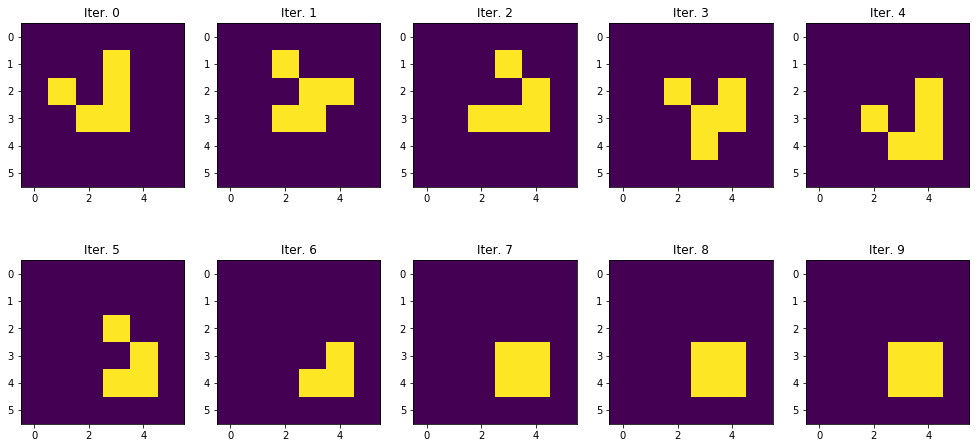

In [77]:
# Question 5

from utils import iteration_jeu

Z = np.asarray(Z_init)
nbIterations = 10
#plt.figure(figsize=(10,5))
plt.subplot(2,5,1)
plt.title("Iter. 0")
plt.imshow(Z)
for i in range(2,nbIterations+1):
    plt.subplot(2,5,i)
    Z = iteration_jeu(Z)
    plt.title("Iter. "+str(i-1))
    plt.imshow(Z)

On remarque qu'on a le même figure, mais il a été bougé à droite et au bas.